<a href="https://colab.research.google.com/github/atik81/datascience_sprint2-titanic/blob/main/Copy_of_week_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scikit-Learn Library:


- This is one of the popular and powerful libraries in Python used for predictive Analysis
-Open Source, Accessible and Reusable in various ways
-Various **Popular example Datasets** are available within this library for practicing different **Supervised Learning Techniques, such as, Regression and Classification**
- Scikit-Learn is built on **NumPy** , **SciPy** and **Matplotlib**, which you are already familiarized with

**Goal for this notyebook:**The purpose of this notebook is to demonstrate a straightforward example of a Python investigation of the Titanic accident that makes use of all available PyData functions. This article is intended for people who are interested in the field or are already working there and want to see an illustration of a Python-based analysis.

# The titanic dataset

The Iris flower dataset is a classic dataset used to identify three flower species based on features describing their [sepals](https://en.wikipedia.org/wiki/Sepalhttps://) and [petals](https://en.wikipedia.org/wiki/Petal). Let's load it first and print its description.

Overview:The procedures I used to make predictions on the surviving column are detailed in the following Jupyter notebook. This issue is categorised as a supervised learning problem because a goal column or variable is present. ** Steps:**

bringing in the required libraries. (Numerical, Pandas, Matplotlib, and Seaborn). reading data in. Visualisation and Data Exploration. Engineering of features. Building a prediction model (any machine learning model in guided learning) incorporating specialised data into the forecasting model. Using test results to make predictions. 


**Dependencies**:

*   install-pandas conda
*   install numpy with conda


*   install scikit-learn and matplotlib with conda

**Libraries importing**





In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('train.csv')
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,1,0,3,male,34.5,0.0,7.8292,NaN,Q
1,2,1,1,female,47.0,1.0,7.0000,C85,S
2,3,1,3,male,62.0,0.0,9.6875,NaN,Q
3,4,1,1,male,27.0,0.0,8.6625,C123,S
4,5,0,3,female,22.0,1.0,12.2875,NaN,S


**Data exploration and visualization**

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    float64
 6   Fare         418 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     418 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 62.8+ KB


In [3]:

train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,418.000000,418.000000,418.000000
mean,446.000000,0.383838,2.308642,29.599282,0.447368,35.541956
std,257.353842,0.486592,0.836071,12.703770,0.896760,55.867684
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,23.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,27.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.750000,1.000000,31.471875
max,891.000000,1.000000,3.000000,76.000000,8.000000,512.329200


checking null **values**

In [4]:
train.isnull().head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


Plotting the null values on a heatmap for better visualization


<Axes: >

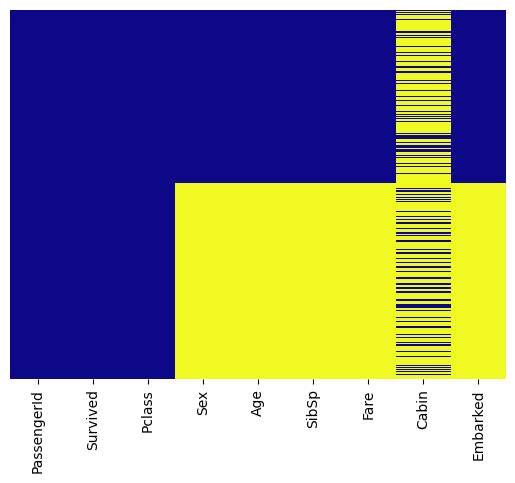

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# every yellow line means missing data 

1. The Age and Cabin columns lack information.
2. Compared to Cabin, the Age column contains considerably less missing values.

<Axes: xlabel='Survived', ylabel='count'>

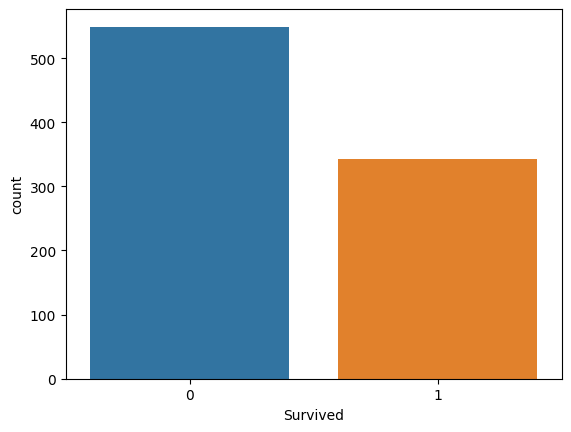

In [6]:
# First of all lets plot who survived and who didn't
sns.countplot(x = 'Survived', data = train)
# So about 580 didn't survive 
# And 320 survived

Dataset has a greater number rows with survived label as 0
About 580+ classify as 0
And 320 as 1

<Axes: xlabel='Survived', ylabel='count'>

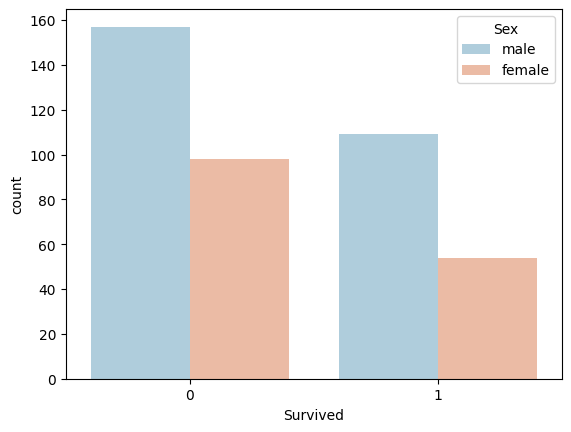

In [7]:
# Lets look at survived with a hue of gender
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

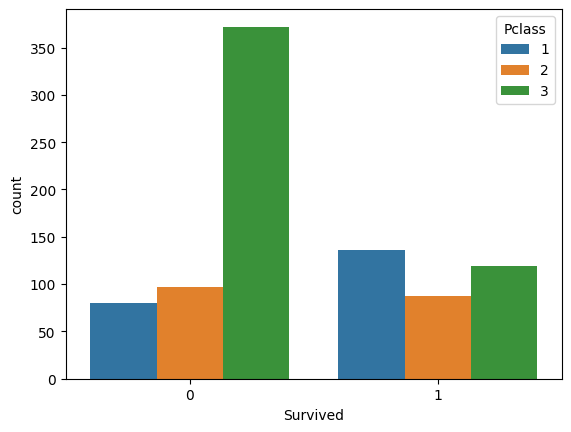

In [8]:
# Lets look at survived with a hue of Pasenger class
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

In [ ]:
# Lets get an idea about the age of people in the data set
#sns.distplot(train['Age'].dropna(), kde= False, bins = 30)

<Axes: xlabel='SibSp', ylabel='count'>

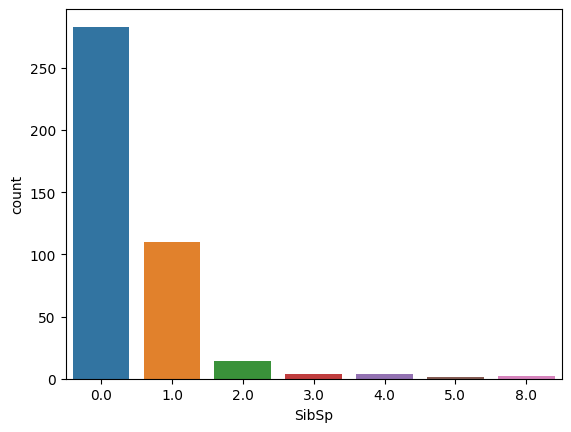

In [9]:
sns.countplot(x = 'SibSp', data = train)
# By looking at this plot, most people on board neither had  siblings / spouse

In [10]:
# Another column which we haven't explored yet is the fare column
train['Fare'].mean()

35.541955980861246

<Axes: >

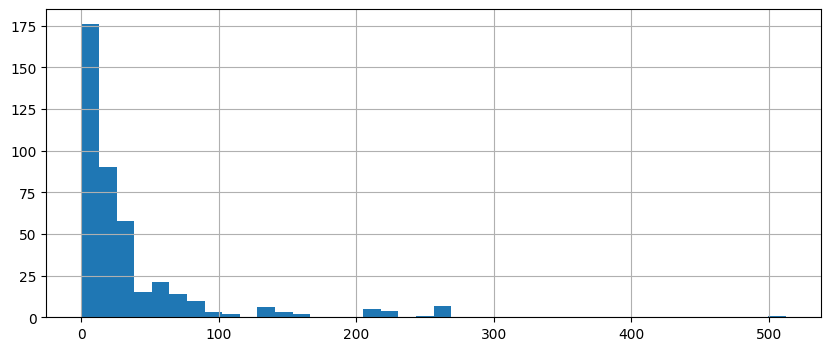

In [11]:
train['Fare'].hist( bins = 40, figsize = (10,4))
# most of the distribution is between 0 and 100 

<Axes: xlabel='Pclass', ylabel='Age'>

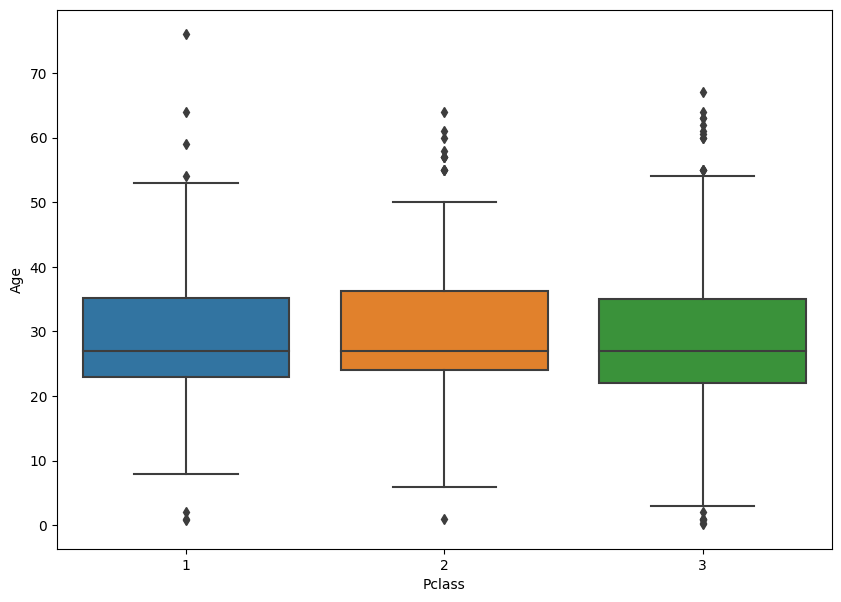

In [12]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)
# The figure shows that the Passengers in class 1 have older people 
# And younger people in lower Pclass

In [13]:
# Filling in null age values
def substitution(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 36         # approx mean value from blue box
        elif Pclass == 2:
            return 29        # approx mean value from orange box
        else:
            return 23         # approx mean value from green box  
    else:
        return Age           # is not null

In [14]:
train['Age'] = train[['Age', 'Pclass']].apply(substitution, axis = 1)

<Axes: >

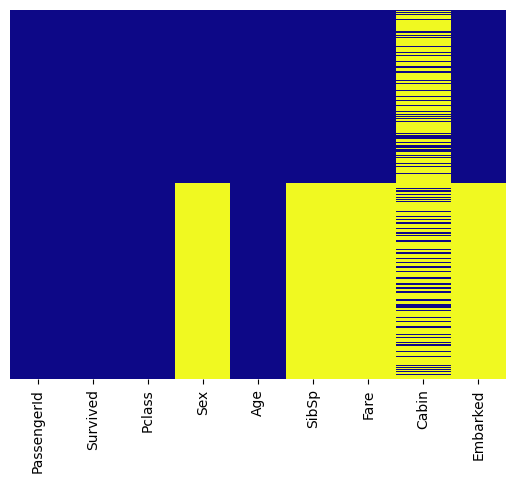

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# no more missing values in Age 

<ipython-input-16-926b6e4dd6f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot= True)


<Axes: >

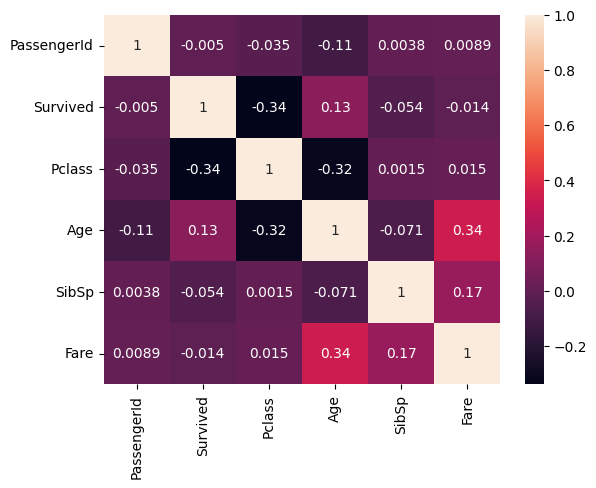

In [16]:
sns.heatmap(train.corr(), annot= True)
# Checking for correlation between columns

In [17]:
train.drop('Cabin',axis=1,inplace=True)
# there are so many missing columns in cabin
# that it seems right to drop it


In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,34.5,0.0,7.8292,Q
1,2,1,1,female,47.0,1.0,7.0000,S
2,3,1,3,male,62.0,0.0,9.6875,Q
3,4,1,1,male,27.0,0.0,8.6625,S
4,5,0,3,female,22.0,1.0,12.2875,S


<Axes: >

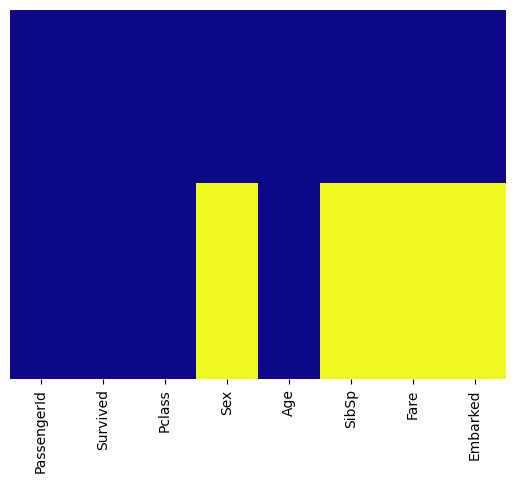

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# Final check for null values

In [20]:
pd.get_dummies(train['Sex']).head()
# we need to convert the sex column
# otherwise the machine learning alogorithm won't be able process the data

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [21]:
pd.get_dummies(train['Sex'], drop_first= True).head()
# now you can not feed both these columns as male and female are opposite
# and it will mess up the machine learning algorthim

,male
0,1
1,0
2,1
3,1
4,0


In [22]:
sex = pd.get_dummies(train['Sex'], drop_first= True)


In [23]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
# same process with Embarked column


In [24]:
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [25]:
# Since Pclass is also a categorical column
pclass = pd.get_dummies(train['Pclass'],drop_first=True)


In [26]:
train = pd.concat([train, sex, embark, pclass], axis = 1)

In [27]:
train.head()
# now, we don't need sex, embarked, plcass column because we have encoded them.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,male,Q,S,2,3
0,1,0,3,male,34.5,0.0,7.8292,Q,1,1,0,0,1
1,2,1,1,female,47.0,1.0,7.0000,S,0,0,1,0,0
2,3,1,3,male,62.0,0.0,9.6875,Q,1,1,0,0,1
3,4,1,1,male,27.0,0.0,8.6625,S,1,0,1,0,0
4,5,0,3,female,22.0,1.0,12.2875,S,0,0,1,0,1


In [30]:
train.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)
# dropping columns which we are not going to use

In [31]:
train.head()
# looks perfect for our machine learning algorithm
# all data is numeric

,PassengerId,Survived,Age,SibSp,Fare,male,Q,S,2,3
0,1,0,34.5,0.0,7.8292,1,1,0,0,1
1,2,1,47.0,1.0,7.0000,0,0,1,0,0
2,3,1,62.0,0.0,9.6875,1,1,0,0,1
3,4,1,27.0,0.0,8.6625,1,0,1,0,0
4,5,0,22.0,1.0,12.2875,0,0,1,0,1


In [32]:
# Features
X = train.drop('Survived', axis = 1)

# Target variable
y = train['Survived']

In [36]:
from sklearn.impute import SimpleImputer

# Replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Define the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model
model.fit(X_imputed, y)


LogisticRegression(max_iter=1000)

In [37]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Define the model
model = HistGradientBoostingClassifier()

# Fit the model
model.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoostingClassifier()

In [38]:
train = pd.read_csv('train.csv')


In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    float64
 6   Fare         418 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     418 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 62.8+ KB


In [41]:
train['Age'] = train[['Age', 'Pclass']].apply(substitution, axis = 1)

In [43]:
# Preparing train data according to the model
sex = pd.get_dummies(train['Sex'], drop_first= True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

train = pd.concat([train, sex, embark, pclass], axis = 1)

train.drop(['Sex','Embarked','Pclass', 'Cabin'],axis=1,inplace=True)

In [ ]:
train.columns

Index(['PassengerId',    'Survived',         'Age',       'SibSp',
             'Parch',        'Fare',        'male',           'Q',
                 'S',             2,             3],
      dtype='object')

<Axes: >

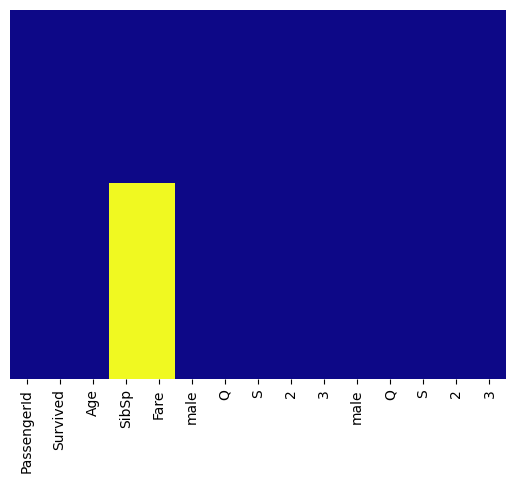

In [44]:
# Checking for null values in test
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        418 non-null    float64
 4   Fare         418 non-null    float64
 5   male         891 non-null    uint8  
 6   Q            891 non-null    uint8  
 7   S            891 non-null    uint8  
 8   2            891 non-null    uint8  
 9   3            891 non-null    uint8  
 10  male         891 non-null    uint8  
 11  Q            891 non-null    uint8  
 12  S            891 non-null    uint8  
 13  2            891 non-null    uint8  
 14  3            891 non-null    uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 43.6 KB


In [46]:
train.fillna(value=train['Fare'].mean(), inplace= True)

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values in the training and validation sets
X_train.fillna(value=X_train['Fare'].mean(), inplace=True)
X_val.fillna(value=X_train['Fare'].mean(), inplace=True)

# Define the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
predictions = model.predict(X_val)


In [49]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values in the training and validation sets
X_train.fillna(value=X_train['Fare'].mean(), inplace=True)
X_val.fillna(value=X_train['Fare'].mean(), inplace=True)

# Define the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
predictions_val = model.predict(X_val)

# Create a DataFrame for the validation set predictions
d_val = {'PassengerId': X_val['PassengerId'], 'Survived': predictions_val}
result_val = pd.DataFrame(d_val)

# Merge the original DataFrame with the validation set predictions DataFrame
result = pd.concat([train[['PassengerId']], result_val])

# Save the results to a CSV file
result.to_csv('predictions.csv', index=False)


In [50]:
result.to_csv('submission.csv', index= False)

In [51]:
result.head()

,PassengerId,Survived
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
